In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/IT20212940

/content/drive/MyDrive/IT20212940


In [10]:
train_path = 'Training_data'
valid_path = 'Testing_data'

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
	
#1 convolution 
	tf.keras.layers.Conv2D(filters=2,kernel_size=3,activation='sigmoid',strides=1,input_shape=(124,124,3)),
	tf.keras.layers.MaxPooling2D(2, 2),
#2 convolution
	tf.keras.layers.Conv2D(filters=2,kernel_size=3,activation='relu',strides=1),
	tf.keras.layers.MaxPooling2D(pool_size=2),


	tf.keras.layers.Flatten(), #into column vector

#50 neurons in the hidden layer
	tf.keras.layers.Dense(50,activation='relu'),

#Reduce the neurons in the hidden layer to avoid overfitting as a drop out
  tf.keras.layers.Dense(25,activation='relu'),

  tf.keras.layers.Dense(5,activation='relu'),
 
#5 output neuron 
	tf.keras.layers.Dense(5,activation='softmax')
	
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 2)         38        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 2)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1682)              0         
                                                                 
 dense (Dense)               (None, 50)                8

In [7]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,target_size=(124,124),batch_size=16,class_mode='categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = train_datagen.flow_from_directory(valid_path,target_size=(124,124),batch_size=32,class_mode='categorical')


Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [12]:
history = model.fit(train_generator,validation_data=test_set,steps_per_epoch=8,epochs=50)

Epoch 1/50
8/8 [==============================] - 3s 259ms/step - loss: 1.6137 - accuracy: 0.1875 - val_loss: 1.6076 - val_accuracy: 0.2188
Epoch 2/50
8/8 [==============================] - 2s 215ms/step - loss: 1.5931 - accuracy: 0.2422 - val_loss: 1.5997 - val_accuracy: 0.2500
Epoch 3/50
8/8 [==============================] - 2s 205ms/step - loss: 1.5843 - accuracy: 0.2846 - val_loss: 1.6239 - val_accuracy: 0.2188
Epoch 4/50
8/8 [==============================] - 2s 209ms/step - loss: 1.6019 - accuracy: 0.2033 - val_loss: 1.6015 - val_accuracy: 0.2266
Epoch 5/50
8/8 [==============================] - 2s 207ms/step - loss: 1.5784 - accuracy: 0.2266 - val_loss: 1.6033 - val_accuracy: 0.2109
Epoch 6/50
8/8 [==============================] - 2s 212ms/step - loss: 1.5711 - accuracy: 0.2578 - val_loss: 1.5967 - val_accuracy: 0.2188
Epoch 7/50
8/8 [==============================] - 2s 207ms/step - loss: 1.5811 - accuracy: 0.2358 - val_loss: 1.6322 - val_accuracy: 0.2266
Epoch 8/50
8/8 [====

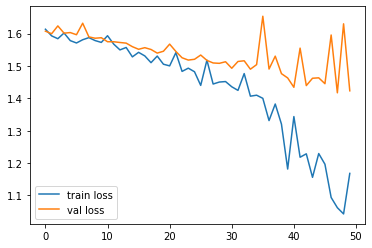

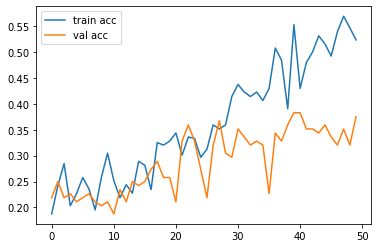

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('q2_IT20212940_loss')

plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('q2_IT20212940_accuracy')